In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gender_guesser.detector as gender
import re
from dateutil import parser 

In [46]:
df = pd.read_csv('orders.csv')
df.head()
d = gender.Detector()


In [47]:
#Cleaning Date times
df['Date'] = pd.to_datetime(df['Date'],format='%Y/%m/%d')
df['Time'] = df['Time'].apply(parser.parse)
df['Hour'] = df['Time'].dt.hour

In [48]:
#Adding gender
df['gender'] = df['Buyer first name'].apply(d.get_gender)


In [49]:
df.columns
df[['Items','Item count', 'Item total','Total price', 'Hour']]
df['Items'] = df['Items'].str.split('|')

In [50]:
#One hot encoding product names, essentially which products were purchased
df['ProductName'] = df.Items.apply(lambda x: ', '.join([str(i) for i in x]))
listOfProducts = df['ProductName'].str.extractall(r'product_name:([\w ]+)')[0].unique()
for product in listOfProducts:
    df[product] = df['ProductName'].apply(lambda x: 1 if product in x else 0  )


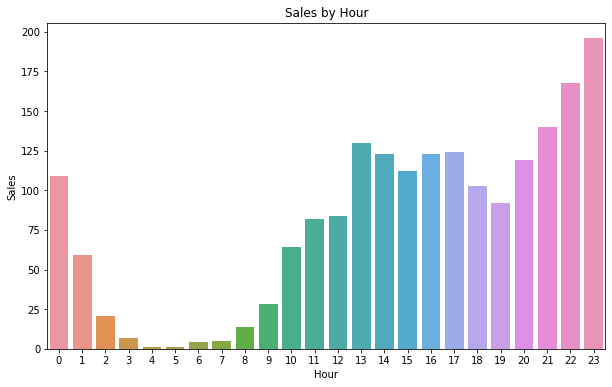

In [51]:
#Sales by hour
fig = plt.figure(figsize=(10,6))
sns.barplot(df.groupby('Hour').size().index,df.groupby('Hour').size().values)
plt.title("Sales by Hour")
plt.ylabel('Sales');



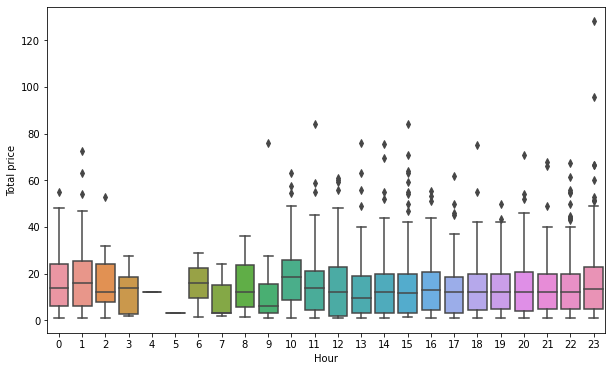

In [52]:
#Average sale amount by hour
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="Hour", y="Total price", data=df);

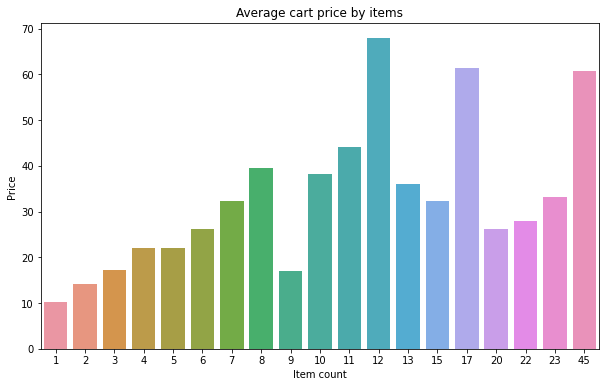

In [53]:
#Average cart price by cart items
fig = plt.figure(figsize=(10,6))
sns.barplot(df.groupby('Item count').agg('mean').index,df.groupby('Item count').agg('mean')['Total price'])
plt.title("Average cart price by items")
plt.ylabel('Price');

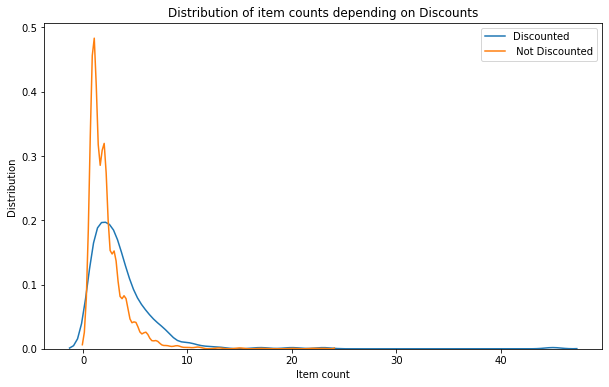

In [54]:
#Distribution of people with discounts and no discounts
fig = plt.figure(figsize=(10,6))

dfDiscounted = df.loc[df['Total price'] < df['Item total']]
sns.distplot(dfDiscounted['Item count'],hist=False, label='Discounted')
sns.distplot(df.loc[df['Total price'] == df['Item total']]['Item count'],hist=False,label=' Not Discounted')
plt.title("Distribution of item counts depending on Discounts")

plt.ylabel('Distribution')
plt.show();

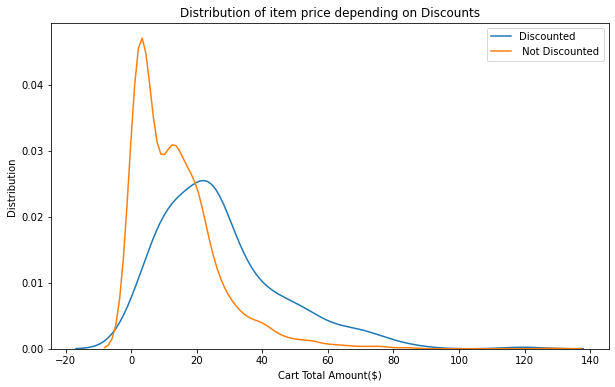

In [55]:
fig = plt.figure(figsize=(10,6))

dfDiscounted = df.loc[df['Total price'] < df['Item total']]
sns.distplot(dfDiscounted['Item total'],hist=False, label='Discounted')
sns.distplot(df.loc[df['Total price'] == df['Item total']]['Item total'],hist=False,label=' Not Discounted')
plt.title("Distribution of item price depending on Discounts")
plt.xlabel('Cart Total Amount($)')
plt.ylabel('Distribution')
plt.show();

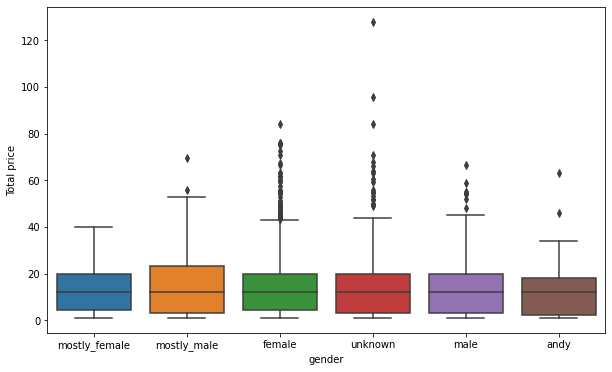

In [56]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="gender", y="Total price", data=df)

In [57]:
x = df.groupby('gender').agg('sum').loc[:,'Single Stickers':'Howling Bear'].reset_index()
women = x.loc[(x['gender'] == 'female') | (x['gender'] == 'mostly_female'),x.columns != 'gender']
men = x.loc[(x['gender'] == 'male') | (x['gender'] == 'mostly_male'),x.columns != 'gender']
unknown = x.loc[(x['gender'] == 'unknown'),x.columns != 'gender']

womenPopular = women[women.columns[women.sum()>30]]
womenMedPopular = women[women.columns[(women.sum()<30) & (women.sum() > 15)]]
womenUnPopular = women[women.columns[women.sum() < 15]]
menPopular = men[men.columns[men.sum()>20]]
menMedPopular = men[men.columns[(men.sum()<20) & (men.sum() > 10)]]
menUnPopular = men[men.columns[men.sum() < 10]]
unknownPopular = unknown[unknown.columns[unknown.sum()>20]]
unknownMedPopular = unknown[unknown.columns[(unknown.sum()<20) & (unknown.sum() > 10)]]
unknownUnPopular = unknown[unknown.columns[unknown.sum() < 10]]


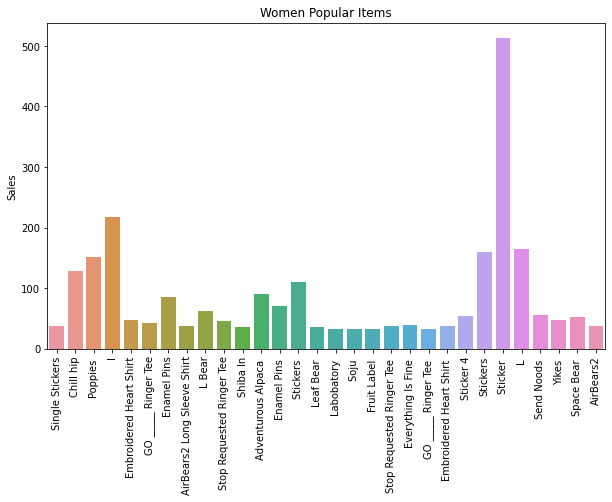

In [58]:
fig = plt.figure(figsize=(10,6))
sns.barplot(womenPopular.columns,sum(womenPopular.values))
plt.xticks(rotation=90)
plt.title('Women Popular Items')
plt.ylabel('Sales');



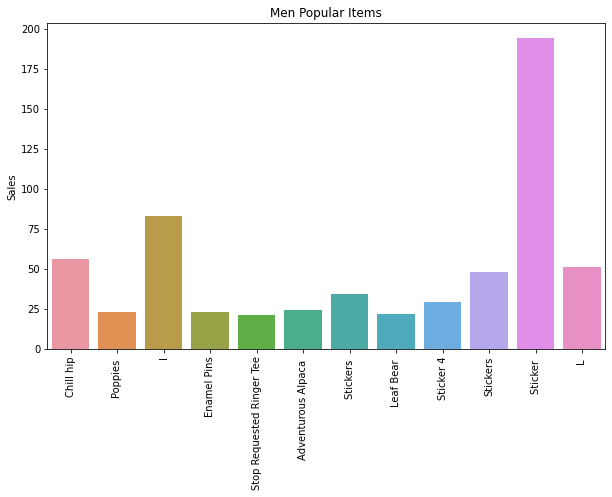

In [59]:
fig = plt.figure(figsize=(10,6))
sns.barplot(menPopular.columns,sum(menPopular.values))
plt.xticks(rotation=90)
plt.title('Men Popular Items')
plt.ylabel('Sales');



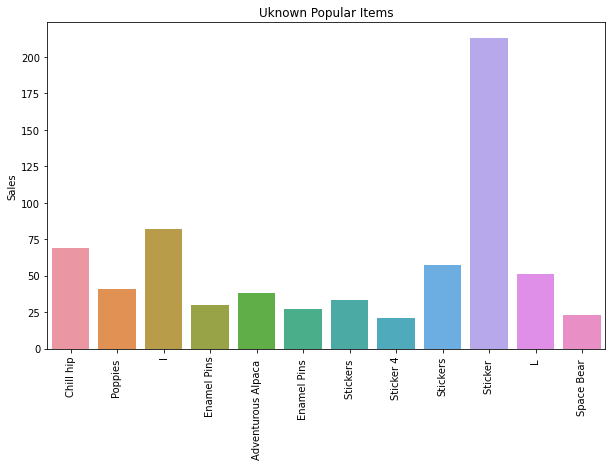

In [60]:
fig = plt.figure(figsize=(10,6))
sns.barplot(unknownPopular.columns,sum(unknownPopular.values))
plt.xticks(rotation=90)
plt.title('Uknown Popular Items')
plt.ylabel('Sales');



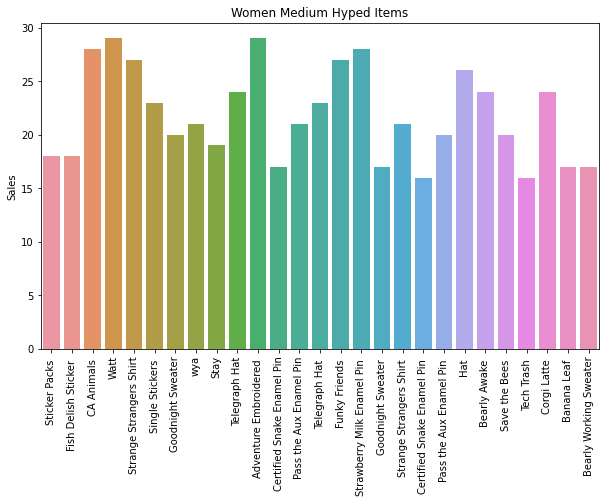

In [61]:
fig = plt.figure(figsize=(10,6))
sns.barplot(womenMedPopular.columns,sum(womenMedPopular.values))
plt.xticks(rotation=90)
plt.title('Women Medium Hyped Items')
plt.ylabel('Sales');


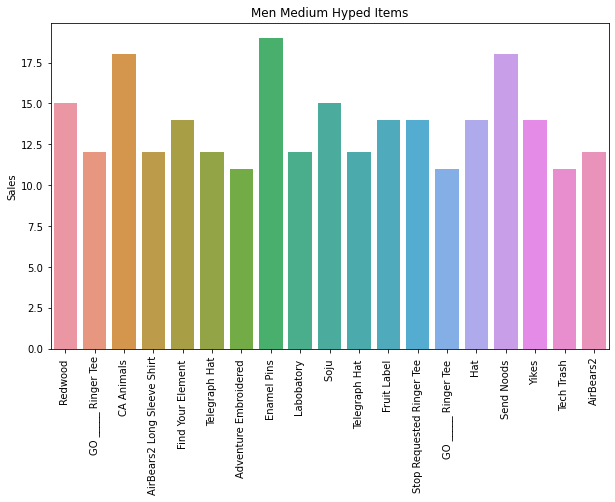

In [62]:
fig = plt.figure(figsize=(10,6))
sns.barplot(menMedPopular.columns,sum(menMedPopular.values))
plt.xticks(rotation=90)
plt.title('Men Medium Hyped Items')
plt.ylabel('Sales');

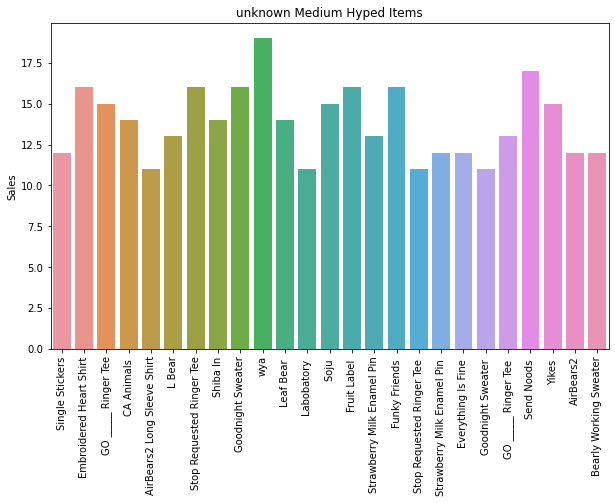

In [63]:
fig = plt.figure(figsize=(10,6))
sns.barplot(unknownMedPopular.columns,sum(unknownMedPopular.values))
plt.xticks(rotation=90)
plt.title('unknown Medium Hyped Items')
plt.ylabel('Sales');

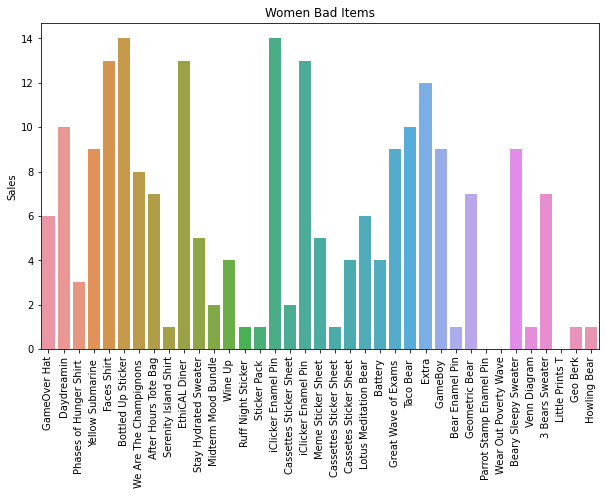

In [64]:
fig = plt.figure(figsize=(10,6))
sns.barplot(womenUnPopular.columns,sum(womenUnPopular.values))
plt.xticks(rotation=90)
plt.title('Women Bad Items')
plt.ylabel('Sales');

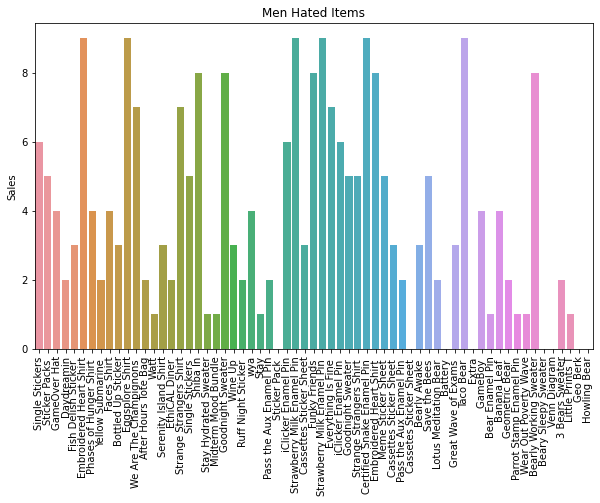

In [65]:
fig = plt.figure(figsize=(10,6))
sns.barplot(menUnPopular.columns,sum(menUnPopular.values))
plt.xticks(rotation=90)
plt.title('Men Hated Items')
plt.ylabel('Sales');

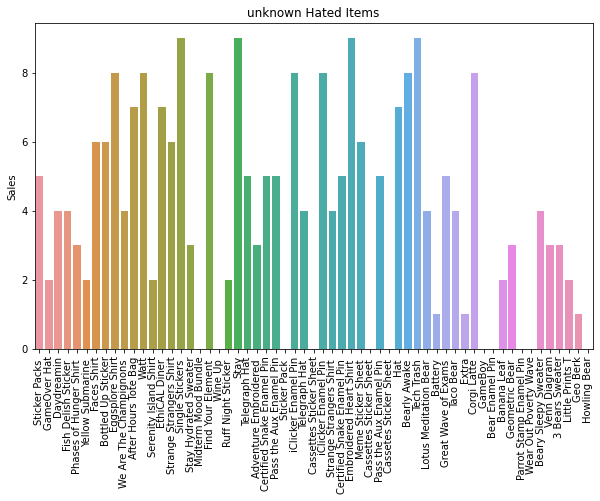

In [66]:
fig = plt.figure(figsize=(10,6))
sns.barplot(unknownUnPopular.columns,sum(unknownUnPopular.values))
plt.xticks(rotation=90)
plt.title('unknown Hated Items')
plt.ylabel('Sales');

In [229]:

clusterdf = df[['Item count', 'Item total', 'Total price', 'gender','Single Stickers',
 'Chill hip',
 'Sticker Packs ',
 'GameOver Hat',
 'Poppies ',
 'I',
 'Daydreamin',
 'Fish Delish Sticker ',
 'Redwood ',
 'Embroidered Heart Shirt',
 'Phases of Hunger Shirt ',
 'GO _____ Ringer Tee',
 'Enamel Pins',
 'CA Animals ',
 'AirBears2 Long Sleeve Shirt',
 'Yellow Submarine ',
 'Faces Shirt',
 'Bottled Up Sticker',
 'Eggsplore Shirt',
 'We Are The Champignons ',
 'After Hours Tote Bag',
 'Watt',
 'Serenity Island Shirt',
 'EthiCAL Diner ',
 'Strange Strangers Shirt',
 'L Bear',
 'Stop Requested Ringer Tee',
 'Single Stickers ',
 'Shiba In',
 'Stay Hydrated Sweater',
 'Midterm Mood Bundle',
 'Goodnight Sweater',
 'Find Your Element ',
 'Adventurous Alpaca ',
 'Wine Up ',
 'Ruff Night Sticker ',
 'wya',
 'Stay',
 'Telegraph Hat',
 'Adventure Embroidered ',
 'Enamel Pins ',
 'Stickers ',
 'Leaf Bear ',
 'Certified Snake Enamel Pin',
 'Pass the Aux Enamel Pin',
 'Sticker Pack ',
 'Labobatory ',
 'iClicker Enamel Pin',
 'Soju ',
 'Telegraph Hat ',
 'Fruit Label ',
 'Strawberry Milk Enamel Pin',
 'Cassettes Sticker Sheet',
 'Funky Friends ',
 'Stop Requested Ringer Tee ',
 'Strawberry Milk Enamel Pin ',
 'Everything Is Fine ',
 'iClicker Enamel Pin ',
 'Goodnight Sweater ',
 'Strange Strangers Shirt ',
 'Certified Snake Enamel Pin ',
 'GO _____ Ringer Tee ',
 'Embroidered Heart Shirt ',
 'Meme Sticker Sheet ',
 'Cassettes Sticker Sheet ',
 'Pass the Aux Enamel Pin ',
 'Sticker 4',
 'Cassetes Sticker Sheet ',
 'Stickers',
 'Hat ',
 'Sticker ',
 'L ',
 'Bearly Awake ',
 'Send Noods ',
 'Yikes ',
 'Save the Bees ',
 'Tech Trash ',
 'Lotus Meditation Bear ',
 'Battery ',
 'Great Wave of Exams ',
 'Taco Bear ',
 'Extra',
 'Corgi Latte ',
 'GameBoy ',
 'Space Bear ',
 'Bear Enamel Pin',
 'Banana Leaf ',
 'Geometric Bear ',
 'Parrot Stamp Enamel Pin',
 'Wear Out Poverty Wave',
 'AirBears2',
 'Bearly Working Sweater',
 'Beary Sleepy Sweater',
 'Venn Diagram',
 '3 Bears Sweater',
 'Little Prints T',
 'Geo Berk',
 'Howling Bear']]

In [230]:
clusterdf = pd.get_dummies(clusterdf,  columns=['gender'],drop_first=True)


In [231]:
clusterdf['gender_male'] = clusterdf['gender_mostly_male'] + clusterdf['gender_male']
clusterdf['gender_female'] = clusterdf['gender_mostly_female'] + clusterdf['gender_female']
clusterdf= clusterdf.drop(columns=['gender_mostly_female','gender_mostly_male'])

In [232]:
from sklearn.cluster import KMeans
tesing = KMeans(n_clusters=3).fit(clusterdf)
clusterdf_labels = clusterdf.copy()
clusterdf_labels['cluster'] = tesing.labels_

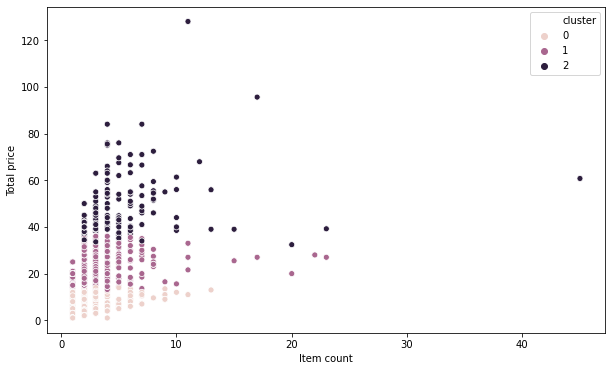

In [233]:
fig = plt.figure(figsize=(10,6))

sns.scatterplot(x=clusterdf_labels['Item count'],y=clusterdf_labels['Total price'],hue=clusterdf_labels['cluster'])

In [234]:
clusterdf_labels

,Item count,Item total,Total price,Single Stickers,Chill hip,Sticker Packs,GameOver Hat,Poppies,I,Daydreamin,...,Beary Sleepy Sweater,Venn Diagram,3 Bears Sweater,Little Prints T,Geo Berk,Howling Bear,gender_female,gender_male,gender_unknown,cluster
0,2,3.00,3.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1.50,1.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,6.00,6.00,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,14.25,14.25,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,11,27.00,27.00,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,1,20.00,20.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1905,3,21.00,21.00,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
1906,1,1.00,1.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1907,3,3.00,3.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
clusterdf_labels = clusterdf_labels.loc[:,clusterdf_labels.columns != 'gender_unknown']
clusterdf_labels = clusterdf_labels.loc[:,clusterdf_labels.columns != 'gender_female']

train, test = clusterdf_labels.loc[:,clusterdf_labels.columns != 'gender_male'],clusterdf_labels['gender_male']
X_train, X_test, y_train, y_test = train_test_split(
    
    train, test, test_size=0.2)



In [239]:
lm = LogisticRegression(max_iter=3000,solver='liblinear',penalty='l1').fit(X_train, y_train)

lm.score(X_test, y_test)



0.8089005235602095

In [240]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

rf.score(X_test, y_test)


0.7853403141361257

In [245]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier().fit(X_train, y_train)

svm.score(X_test, y_test)


0.8036649214659686